# 3. Benchmarking roadmap construction methods

In JAXMAPP, we manage benchmark experiments using `hydra`.

In [1]:
!ls ../scripts/config/*

../scripts/config/create_eval_data.yaml      ../scripts/config/eval.yaml
../scripts/config/create_training_data.yaml  ../scripts/config/train.yaml

../scripts/config/dataset:
eval_example.yaml  eval_standard.yaml  instance  training_hetero.yaml

../scripts/config/model:
ctrm.yaml

../scripts/config/planner:
pp.yaml

../scripts/config/sampler:
ctrm.yaml  grid_shared.yaml  random.yaml  random_shared.yaml


To evaluate your own roadmap construction methods, you first need to create a new configuration file in `../scripts/config/sampler`.
Here's an example of random sampler:

In [2]:
!cat ../scripts/config/sampler/random.yaml

_target_: jaxmapp.roadmap.random_sampler.RandomSampler

share_roadmap: false
num_samples: 3000
max_T: 64

Once configuration file is prepared, execute the following command at the root directory of this project:

```console
$ python scripts/eval.py sampler=[your-sampler-config-name]
```

Then the program will evaluate your method with the data in `data_example/eval_data/example` and store the result in the same directory with the name `${now:%Y-%m-%d_%H-%M-%S}_your_sampler_name.pkl`.

Once all the methods are evaluated, you can compare their results as follows:

2022-02-02 15:12:12.959995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


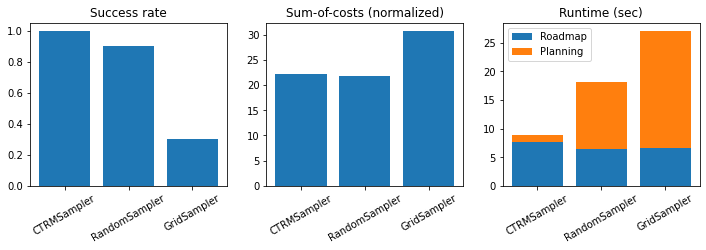

In [3]:
from jaxmapp.utils.viz import visualize_evaluation_results

dirname = "../data_example/eval_data/example"  # change this to "/workspace" if you are in the docker container

visualize_evaluation_results(dirname);

The above evaluation is using only 10 instances. You can create your own evaluation dataset with the following steps.

1. Create dataset config in `config/dataset` (see `config/dataset/eval_example.yaml` for example)
2. Create instance generation config in `config/dataset/instance` and specify it in the above dataset config file.
3. Execute `python scripts/create_eval_data.py dataset=[your-dataset-config-name]`
4. Execute `python scripts/eval.py sampler=[sample-config-name] dataset=[your-dataset-config-name]`

For instance, if you run the step 3 and 4 with `dataset=eval_standard`, you can create the 100 problem instances compatible with `homo-basis` data used in the CTRM paper.